# Naive Bayes Classifier

# Objective:
To filter mobile phone spam using the Naive Bayes algorithm

# Dataset: sms_spam.csv
https://github.com/stedy/Machine-Learning-with-R-datasets

# 1. Load necessary libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import math
from datetime import datetime
import string
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm




# 2. Load data

In [16]:
df = pd.read_csv('spamsms-1.csv',encoding = 'latin-1')

df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
type    5572 non-null object
text    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 3. Exploring and preparing the data 

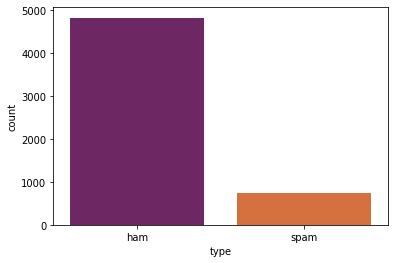

In [19]:
df.groupby(['type']).count()


## a) Find the distribution of target variable (Class) 


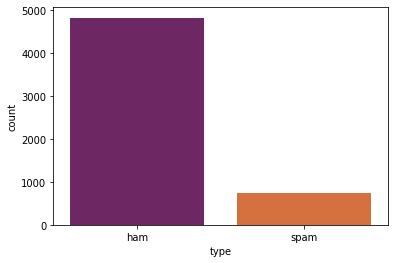

In [25]:
sn.countplot('type', data=df, palette='inferno')


## b) Plot the distribution of target variable using histogram

In [28]:
df.hist(column='type')

ValueError: hist method requires numerical columns, nothing to plot.

## c) Summary Statistics and explain insights for at least 2 variables

# 4. Create training and test datasets

In [30]:
x_train, y_train, x_test, y_test =  train_test_split(df['text'],df['type'])

x_train

4962                   I want to see your pretty pussy...
204                             U call me alter at 11 ok.
2735                        I meant middle left or right?
5462    Txt: CALL to No: 86888 & claim your reward of ...
1030    Can not use foreign stamps in this country. Go...
                              ...                        
3310    HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...
5013    Hello boytoy ! Geeee ... I'm missing you today...
2834    Ya they are well and fine., BBD(pooja) full pi...
4077                  Gam gone after outstanding innings.
104          Umma my life and vava umma love you lot dear
Name: text, Length: 4179, dtype: object

# 5. Prepare the data by splitting the text documents into words and also create indicator feature for frequent words


Here, as this the dataset which requires some Text Analytics. This might not yet come into your notice, hence giving the 
solution for the reference. This may be helpful in the future concepts.

We want to find the frequencies of words in the spam and non-spam messages. The words of the messages will be model features.

In [33]:
#Data preparation – splitting text documents into words
def text_process (x):
    return x.split()
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])
print(len(bow_transformer.vocabulary_))


15585


In [13]:
print(bow_transformer.get_feature_names()[0])
print(bow_transformer.get_feature_names()[8555])

!
february


In [14]:
#Data preparation – creating indicator features for frequent words
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4168, 15585)


# 6. Create indicator features for frequent words

In [17]:
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4168, 15585)


# 7. Train a model on the data

In [18]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, y_train)

# 8. Evaluate model performance

In [19]:
messages_bow = bow_transformer.transform(x_test)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1404, 15585)


In [20]:
y_pred = spam_detect_model.predict(messages_tfidf)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [21]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))

confusion_matrix
[[1222    0]
 [  80  102]]


# 9. Measure performance for classifcation

In [22]:
df_table = confusion_matrix(y_test,y_pred)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.94
precision:  1.0
recall   :  0.56
F1 score :  0.72
